In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")


In [9]:
files = [
    "api_data_aadhar_biometric_0_500000.csv",
    "api_data_aadhar_biometric_500000_1000000.csv",
    "api_data_aadhar_biometric_1000000_1500000.csv",
    "api_data_aadhar_biometric_1500000_1861108.csv"
]

dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)


In [10]:
df

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029.0,280.0,577.0
1,01-03-2025,Bihar,Madhepura,852121.0,144.0,369.0
2,01-03-2025,Jammu and Kashmir,Punch,185101.0,643.0,1091.0
3,01-03-2025,Bihar,Bhojpur,802158.0,256.0,980.0
4,01-03-2025,Tamil Nadu,Madurai,625514.0,271.0,815.0
...,...,...,...,...,...,...
755027,18-12-2025,Uttar Pradesh,Pratapgarh,230135.0,0.0,2.0
755028,18-12-2025,Uttar Pradesh,Pratapgarh,230143.0,0.0,1.0
755029,18-12-2025,Uttar Pradesh,Pratapgarh,230204.0,2.0,3.0
755030,18-12-2025,Uttar Pradesh,Pratapgarh,230301.0,1.0,0.0


In [11]:
df.shape, df.columns

((755032, 6),
 Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object'))

In [12]:
# Robust date parsing:
df['date'] = pd.to_datetime(
    df['date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Drop rows with missing critical identifiers
df = df.dropna(subset=['date', 'state', 'district', 'pincode'])


In [13]:
df

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029.0,280.0,577.0
1,2025-03-01,Bihar,Madhepura,852121.0,144.0,369.0
2,2025-03-01,Jammu and Kashmir,Punch,185101.0,643.0,1091.0
3,2025-03-01,Bihar,Bhojpur,802158.0,256.0,980.0
4,2025-03-01,Tamil Nadu,Madurai,625514.0,271.0,815.0
...,...,...,...,...,...,...
755027,2025-12-18,Uttar Pradesh,Pratapgarh,230135.0,0.0,2.0
755028,2025-12-18,Uttar Pradesh,Pratapgarh,230143.0,0.0,1.0
755029,2025-12-18,Uttar Pradesh,Pratapgarh,230204.0,2.0,3.0
755030,2025-12-18,Uttar Pradesh,Pratapgarh,230301.0,1.0,0.0


Minimal State Normalization

In [14]:
import re
# Function to standardize state names
def clean_state(x):
    x = str(x).lower()
    x = re.sub(r'[^a-z\s]', ' ', x)
    x = re.sub(r'\s+', ' ', x).strip()
    return x

# Apply cleaning
df['state_clean'] = df['state'].apply(clean_state)

# Correct common known variants
state_map = {
    # Legacy / alternate spellings
    'orissa': 'Odisha',
    'pondicherry': 'Puducherry',
    'uttaranchal': 'Uttarakhand',
    'tamilnadu': 'Tamil Nadu',

    # West Bengal variants (important)
    'west bengli': 'West Bengal',
    'west bangal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bengal': 'West Bengal',
    'Westbengal' : 'West Bengal',
    'West Bangal' : 'West Bengal',


    'andaman and Nicobar Islands' : 'Andaman and Nicobar Islands',
    'andaman & Nicobar Islands' : 'Andaman and Nicobar Islands',

    'Dadra and Nagar Haveli' : 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli and Daman and Diu' : 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman and Diu' : 'Dadra and Nagar Haveli and Daman and Diu',

    'Daman & Diu' : 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli' : 'Dadra and Nagar Haveli and Daman and Diu',

    'The Dadra and Nagar Haveli and Daman and Diu	' : 'Dadra and Nagar Haveli and Daman and Diu',


}

df['state_clean'] = df['state_clean'].replace(state_map)
df['state_clean'] = df['state_clean'].str.title()

# Remove invalid numeric state entries
df = df[~df['state_clean'].str.isnumeric()]

/tmp/ipython-input-3665589220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state_clean'] = df['state'].apply(clean_state)
/tmp/ipython-input-3665589220.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state_clean'] = df['state_clean'].replace(state_map)
/tmp/ipython-input-3665589220.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [15]:
df.drop(columns = ['state'], inplace = True)

Feature Engineering

In [16]:
# Total biometric updates per record
df['total_bio_updates'] = (
    df['bio_age_5_17'] +
    df['bio_age_17_']
)

# Youth biometric update share
df['youth_bio_ratio'] = (
    df['bio_age_5_17'] / df['total_bio_updates']
)

# Adult biometric update share
df['adult_bio_ratio'] = (
    df['bio_age_17_'] / df['total_bio_updates']
)


Biometric Instability Index/State-Level Biometric Instability

In [17]:
# Aggregate biometric update intensity at state level
state_bio = (
    df.groupby('state_clean')
      .agg(
          total_bio_updates=('total_bio_updates', 'sum'),
          avg_bio_updates_per_record=('total_bio_updates', 'mean')
      )
      .sort_values('avg_bio_updates_per_record', ascending=False)
)

state_bio.head()


,total_bio_updates,avg_bio_updates_per_record
state_clean,,
Delhi,1053774.0,283.653836
Madhya Pradesh,4774355.0,165.236900
Dadra And Nagar Haveli,19218.0,147.830769
Chhattisgarh,1861011.0,147.150391
Bihar,3817265.0,114.608491


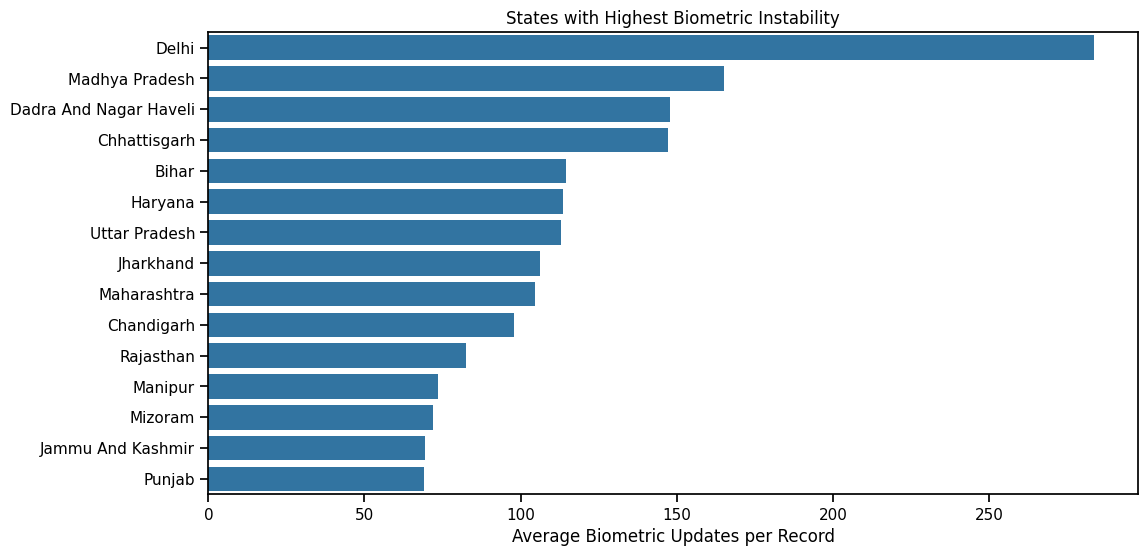

In [18]:
# Visualizing states with highest biometric instability
plt.figure(figsize=(12,6))
sns.barplot(
    data=state_bio.reset_index().head(15),
    x='avg_bio_updates_per_record',
    y='state_clean'
)
plt.title("States with Highest Biometric Instability")
plt.xlabel("Average Biometric Updates per Record")
plt.ylabel("")
plt.show()


Adult-Dominated Biometric Refresh/Age-Based Biometric Behaviour

In [19]:
# Compare adult vs youth contribution to biometric updates
state_bio_age = (
    df.groupby('state_clean')
      .agg(
          youth_ratio=('youth_bio_ratio', 'mean'),
          adult_ratio=('adult_bio_ratio', 'mean')
      )
      .sort_values('adult_ratio', ascending=False)
)

state_bio_age.head()


,youth_ratio,adult_ratio
state_clean,,
Dadra Nagar Haveli,0.104986,0.895014
Andaman Nicobar Islands,0.184306,0.815694
Daman Diu,0.245997,0.754003
Jammu Kashmir,0.311033,0.688967
Dadra And Nagar Haveli And Daman And Diu,0.317496,0.682504


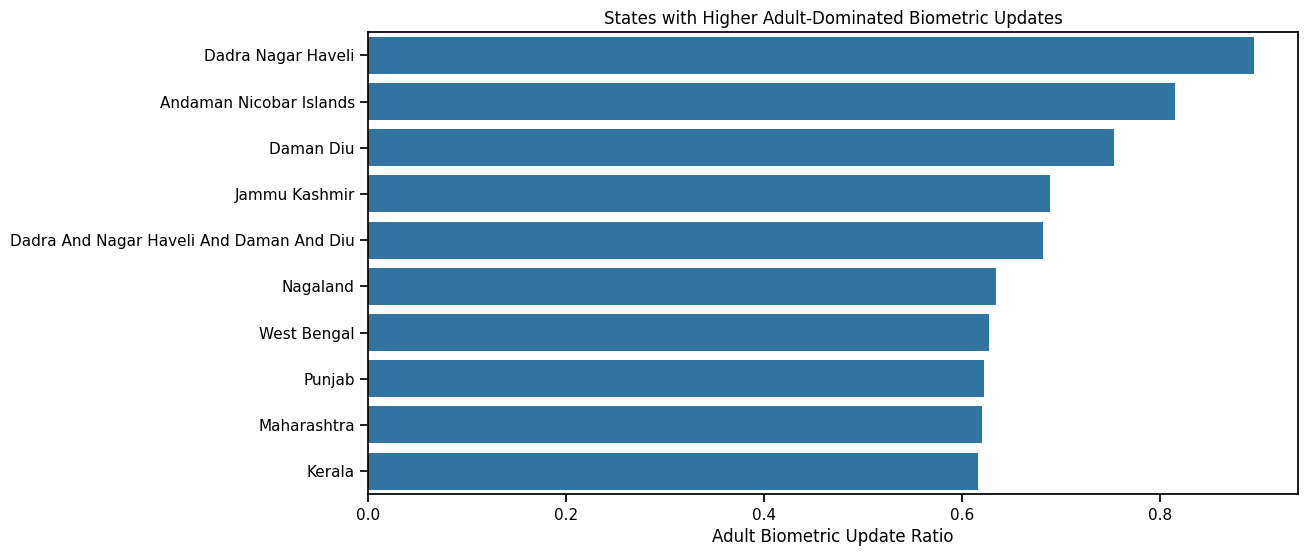

In [20]:
# Visualizing states where adults dominate biometric refresh
plt.figure(figsize=(12,6))
sns.barplot(
    data=state_bio_age.reset_index().head(10),
    x='adult_ratio',
    y='state_clean'
)
plt.title("States with Higher Adult-Dominated Biometric Updates")
plt.xlabel("Adult Biometric Update Ratio")
plt.ylabel("")
plt.show()


In [21]:
# Export key biometric metrics for cross-dataset analysis

biometric_export = state_bio.reset_index()[[
    'state_clean',
    'avg_bio_updates_per_record'
]]

biometric_export = biometric_export.merge(
    state_bio_age.reset_index()[['state_clean', 'adult_ratio']],
    on='state_clean'
)

biometric_export.rename(
    columns={'adult_ratio': 'adult_bio_ratio'},
    inplace=True
)

biometric_export.to_csv(
    "biometric_state_metrics.csv",
    index=False
)

biometric_export.head()


,state_clean,avg_bio_updates_per_record,adult_bio_ratio
0,Delhi,283.653836,0.569477
1,Madhya Pradesh,165.236900,0.543790
2,Dadra And Nagar Haveli,147.830769,0.597913
3,Chhattisgarh,147.150391,0.604677
4,Bihar,114.608491,0.593173


Temporal Biometric Stress Spikes/Daily Biometric Update Aggregation

In [22]:
# Aggregate biometric updates at daily level
daily_bio_updates = (
    df.groupby(['state_clean', 'date'])
      ['total_bio_updates']
      .sum()
      .reset_index()
)


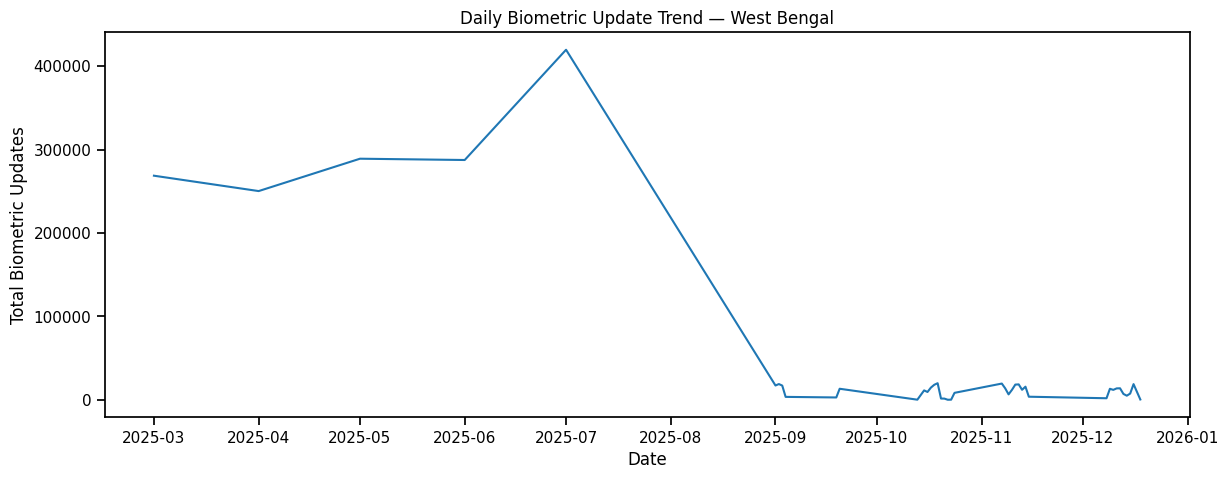

In [23]:
# Example state for temporal stress analysis
example_state = "West Bengal"

plt.figure(figsize=(14,5))
sns.lineplot(
    data=daily_bio_updates[daily_bio_updates['state_clean'] == example_state],
    x='date',
    y='total_bio_updates'
)
plt.title(f"Daily Biometric Update Trend — {example_state}")
plt.xlabel("Date")
plt.ylabel("Total Biometric Updates")
plt.show()
